# Prescription cleaner

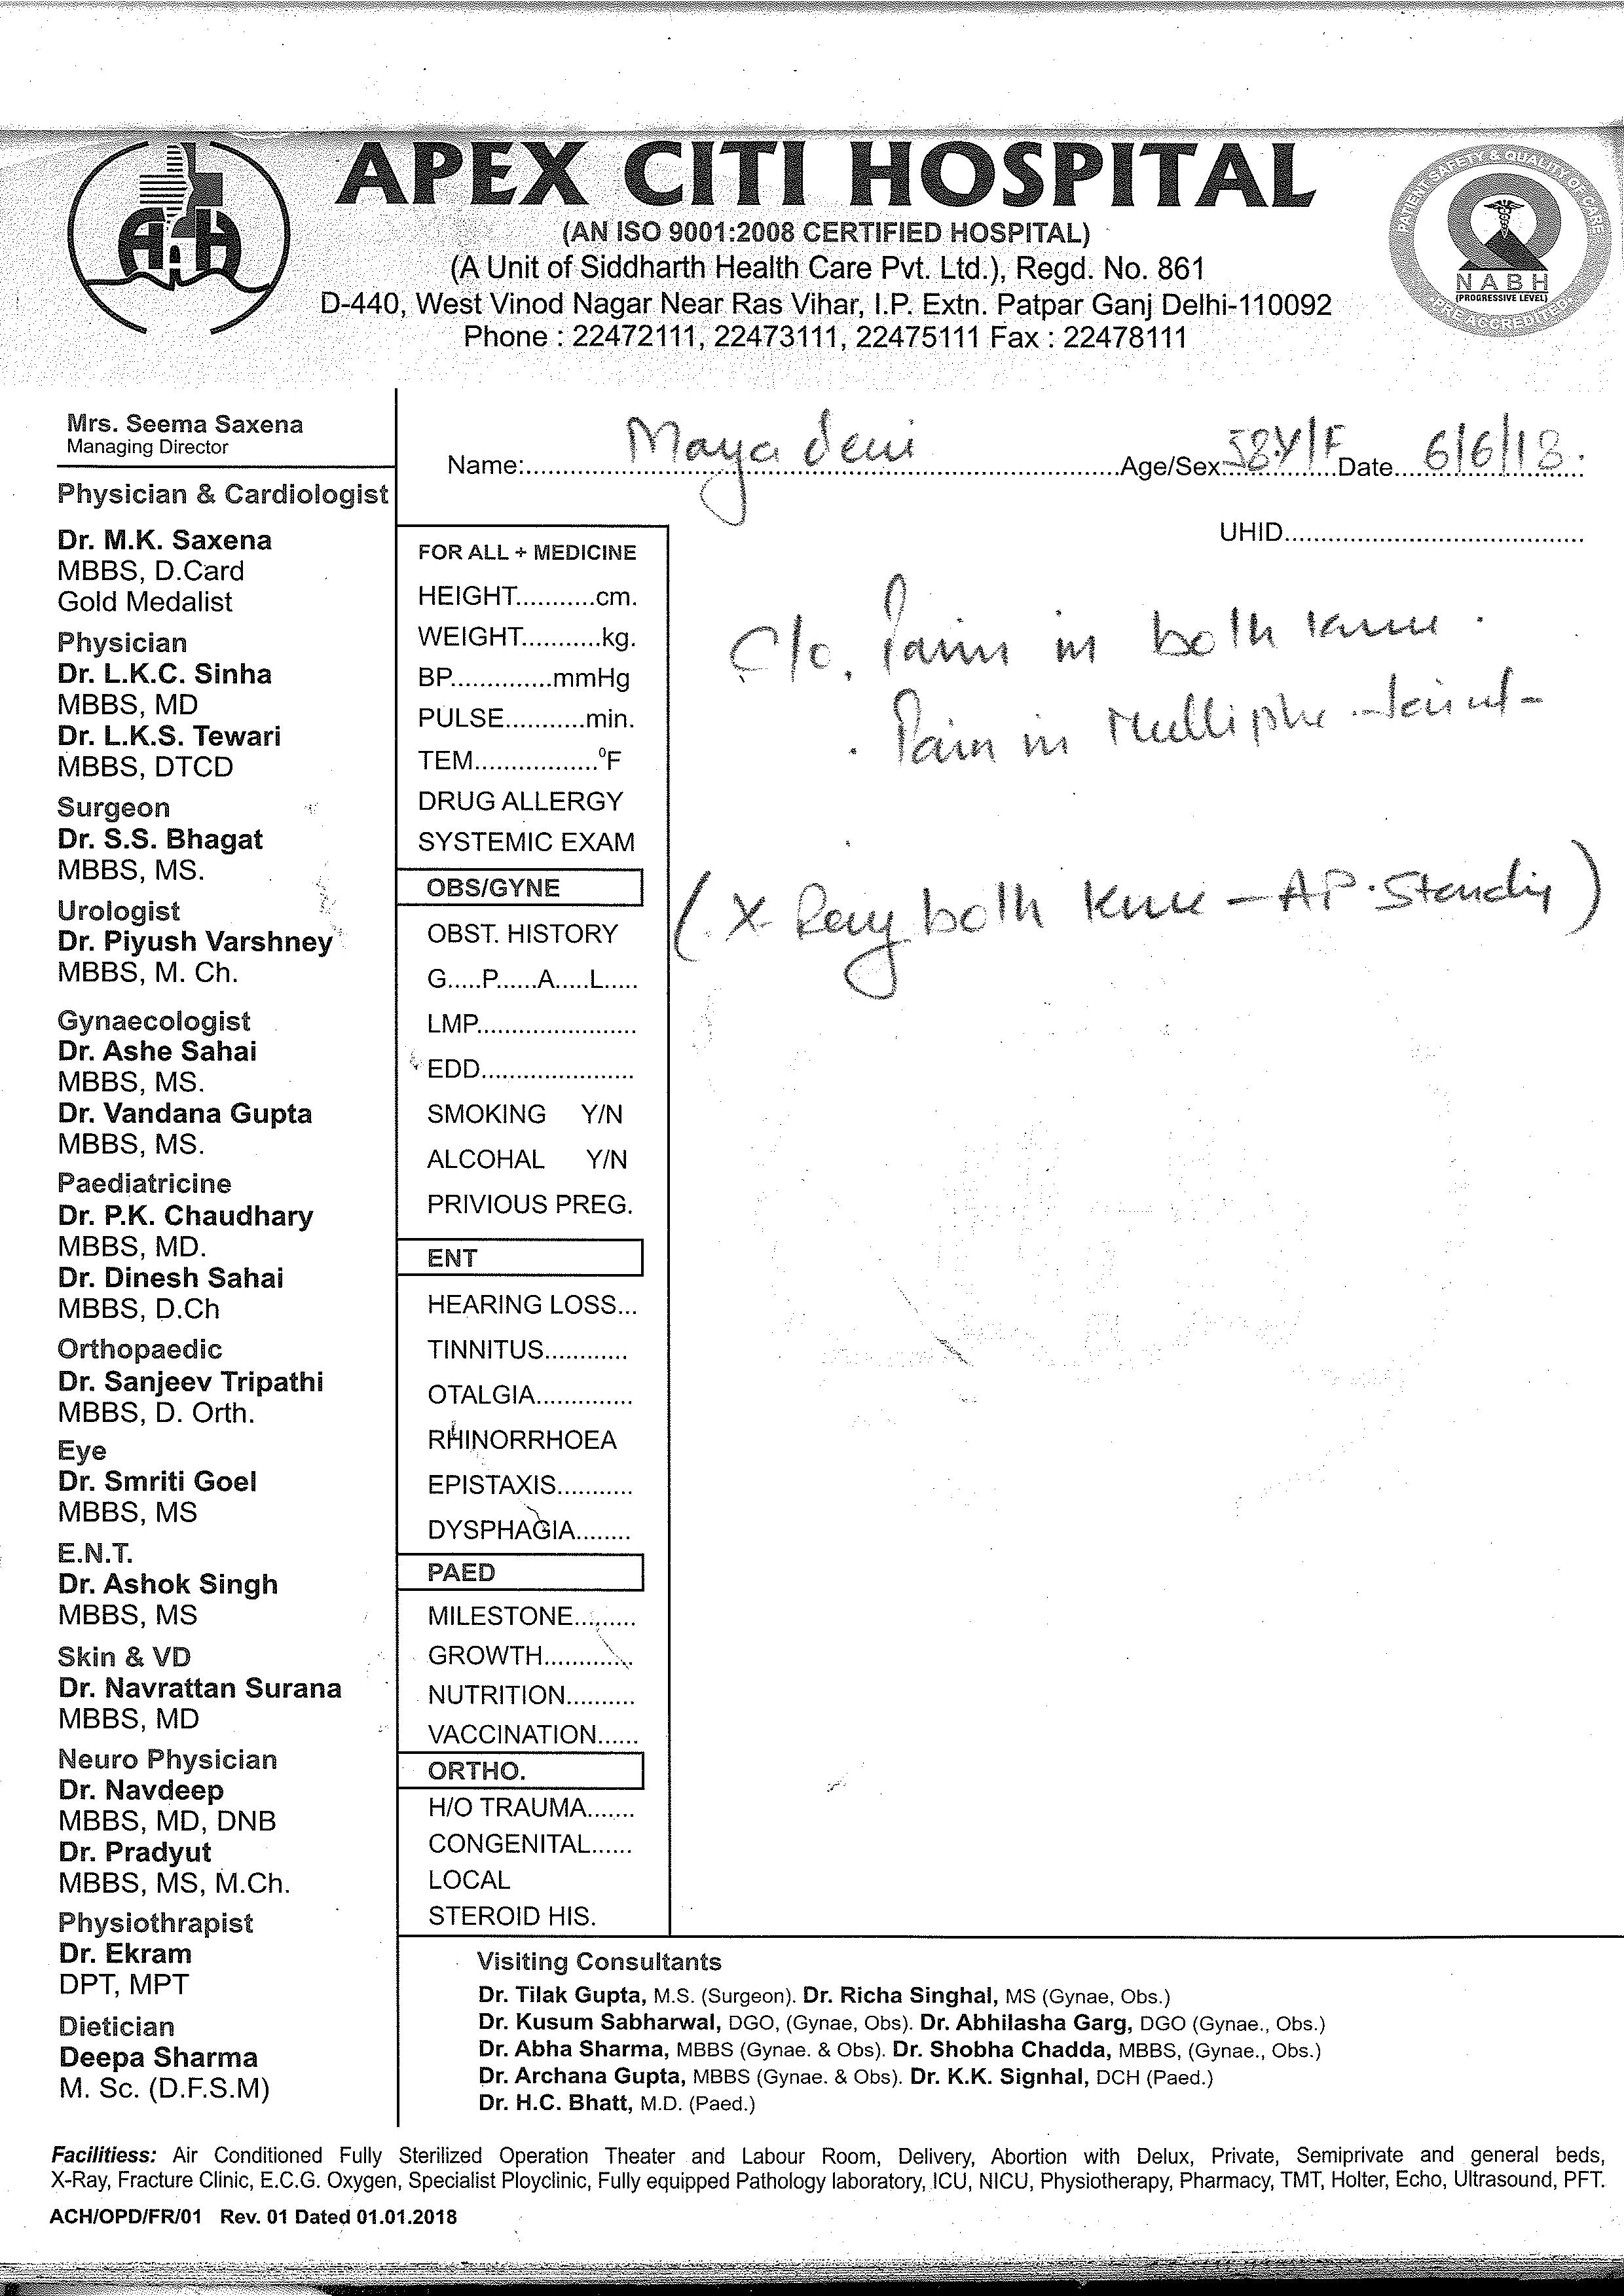

In [ ]:
import cv2
import math
import numpy as np
import imutils
import subprocess
from IPython.display import Image

inputFile = "prescription.jpg"
Image( inputFile)

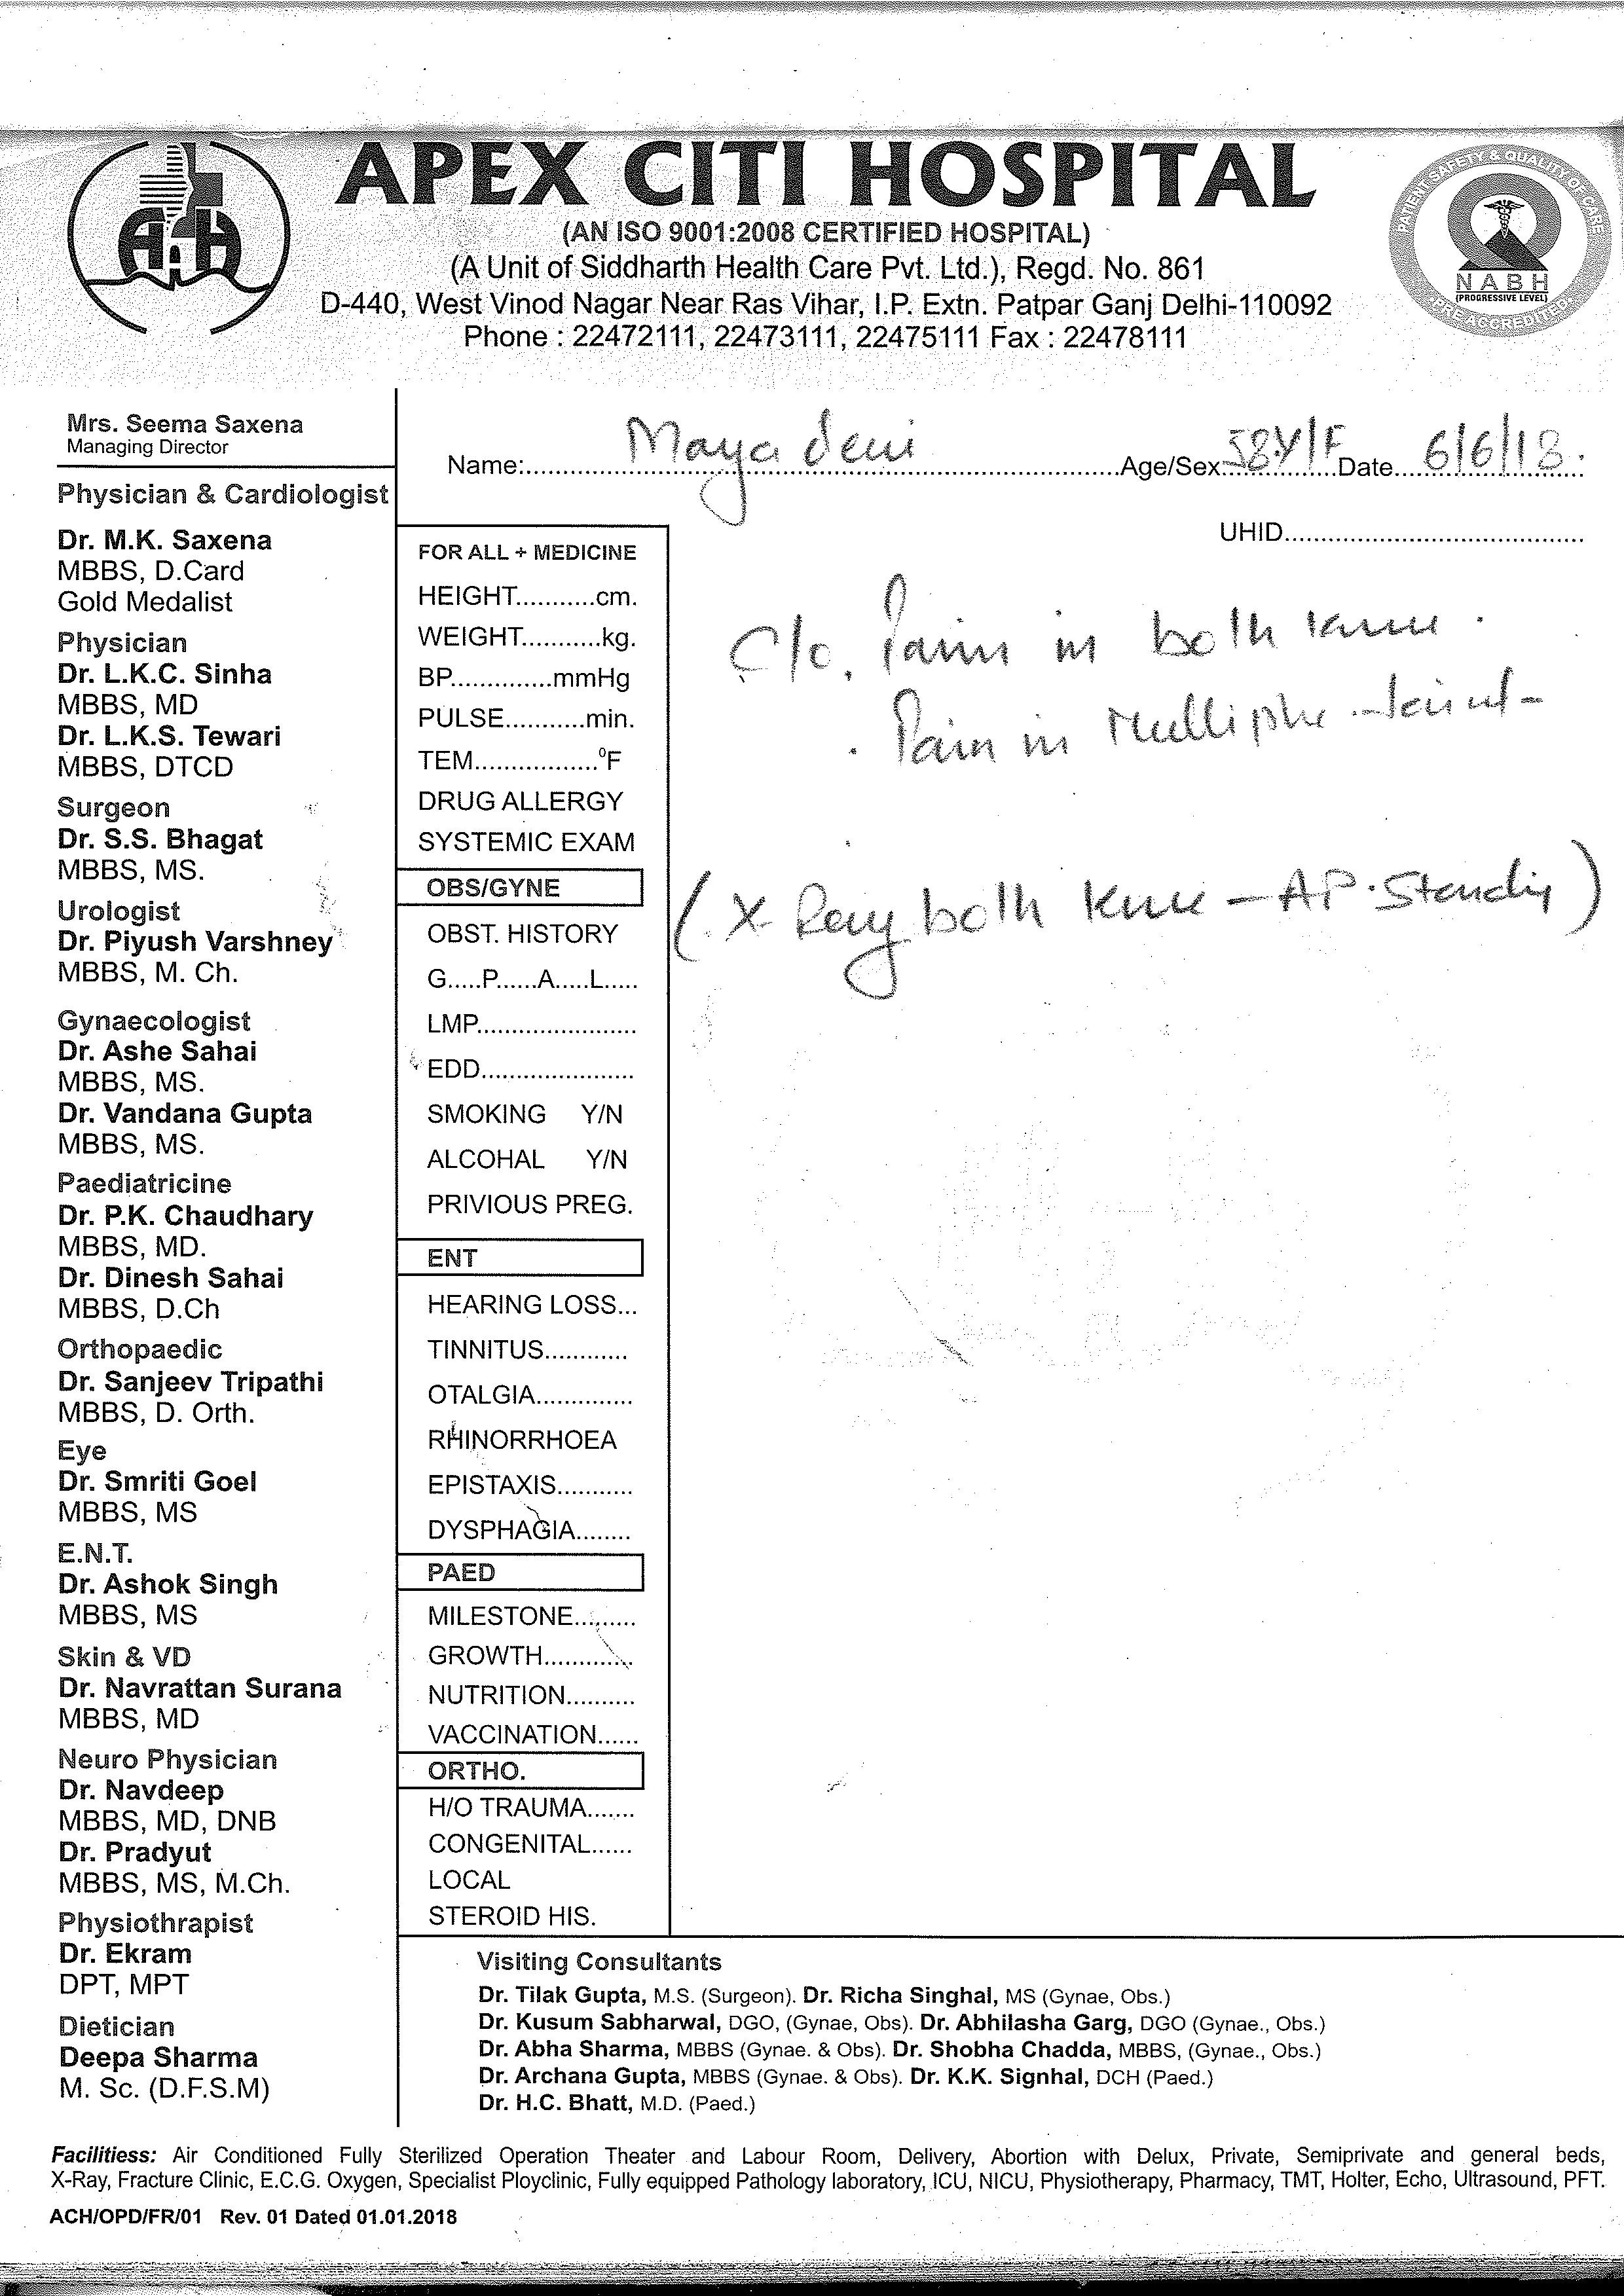

In [24]:
img = cv2.imread(inputFile)

# TODO

cv2.imwrite("result-0.jpg", img)
Image(filename='result-0.jpg')

In [ ]:
options = "result-0.jpg "
options += "-type "
options += "Grayscale "
options += "-negate "
options += "-define morphology:compose=darken "
options += "-morphology Thinning 'Rectangle:15x1+0+0<' "
options += "-negate "
options += "result-1.jpg"

print(options)
# Make sure to install imagemagick, otherwise the following line will fail
subprocess.getoutput(options)
Image(filename="result-1.jpg")

'options = "result-0.jpg "\noptions += "-type "\noptions += "Grayscale "\noptions += "-negate "\noptions += "-define morphology:compose=darken "\noptions += "-morphology Thinning \'Rectangle:15x1+0+0<\' "\noptions += "-negate "\noptions += "result-1.jpg"\n\nprint(options)\n# Make sure to install imagemagick, otherwise the following line will fail\nsubprocess.getoutput(options)\nImage(filename="result-1.jpg")'

## Remove noise and make text clearer

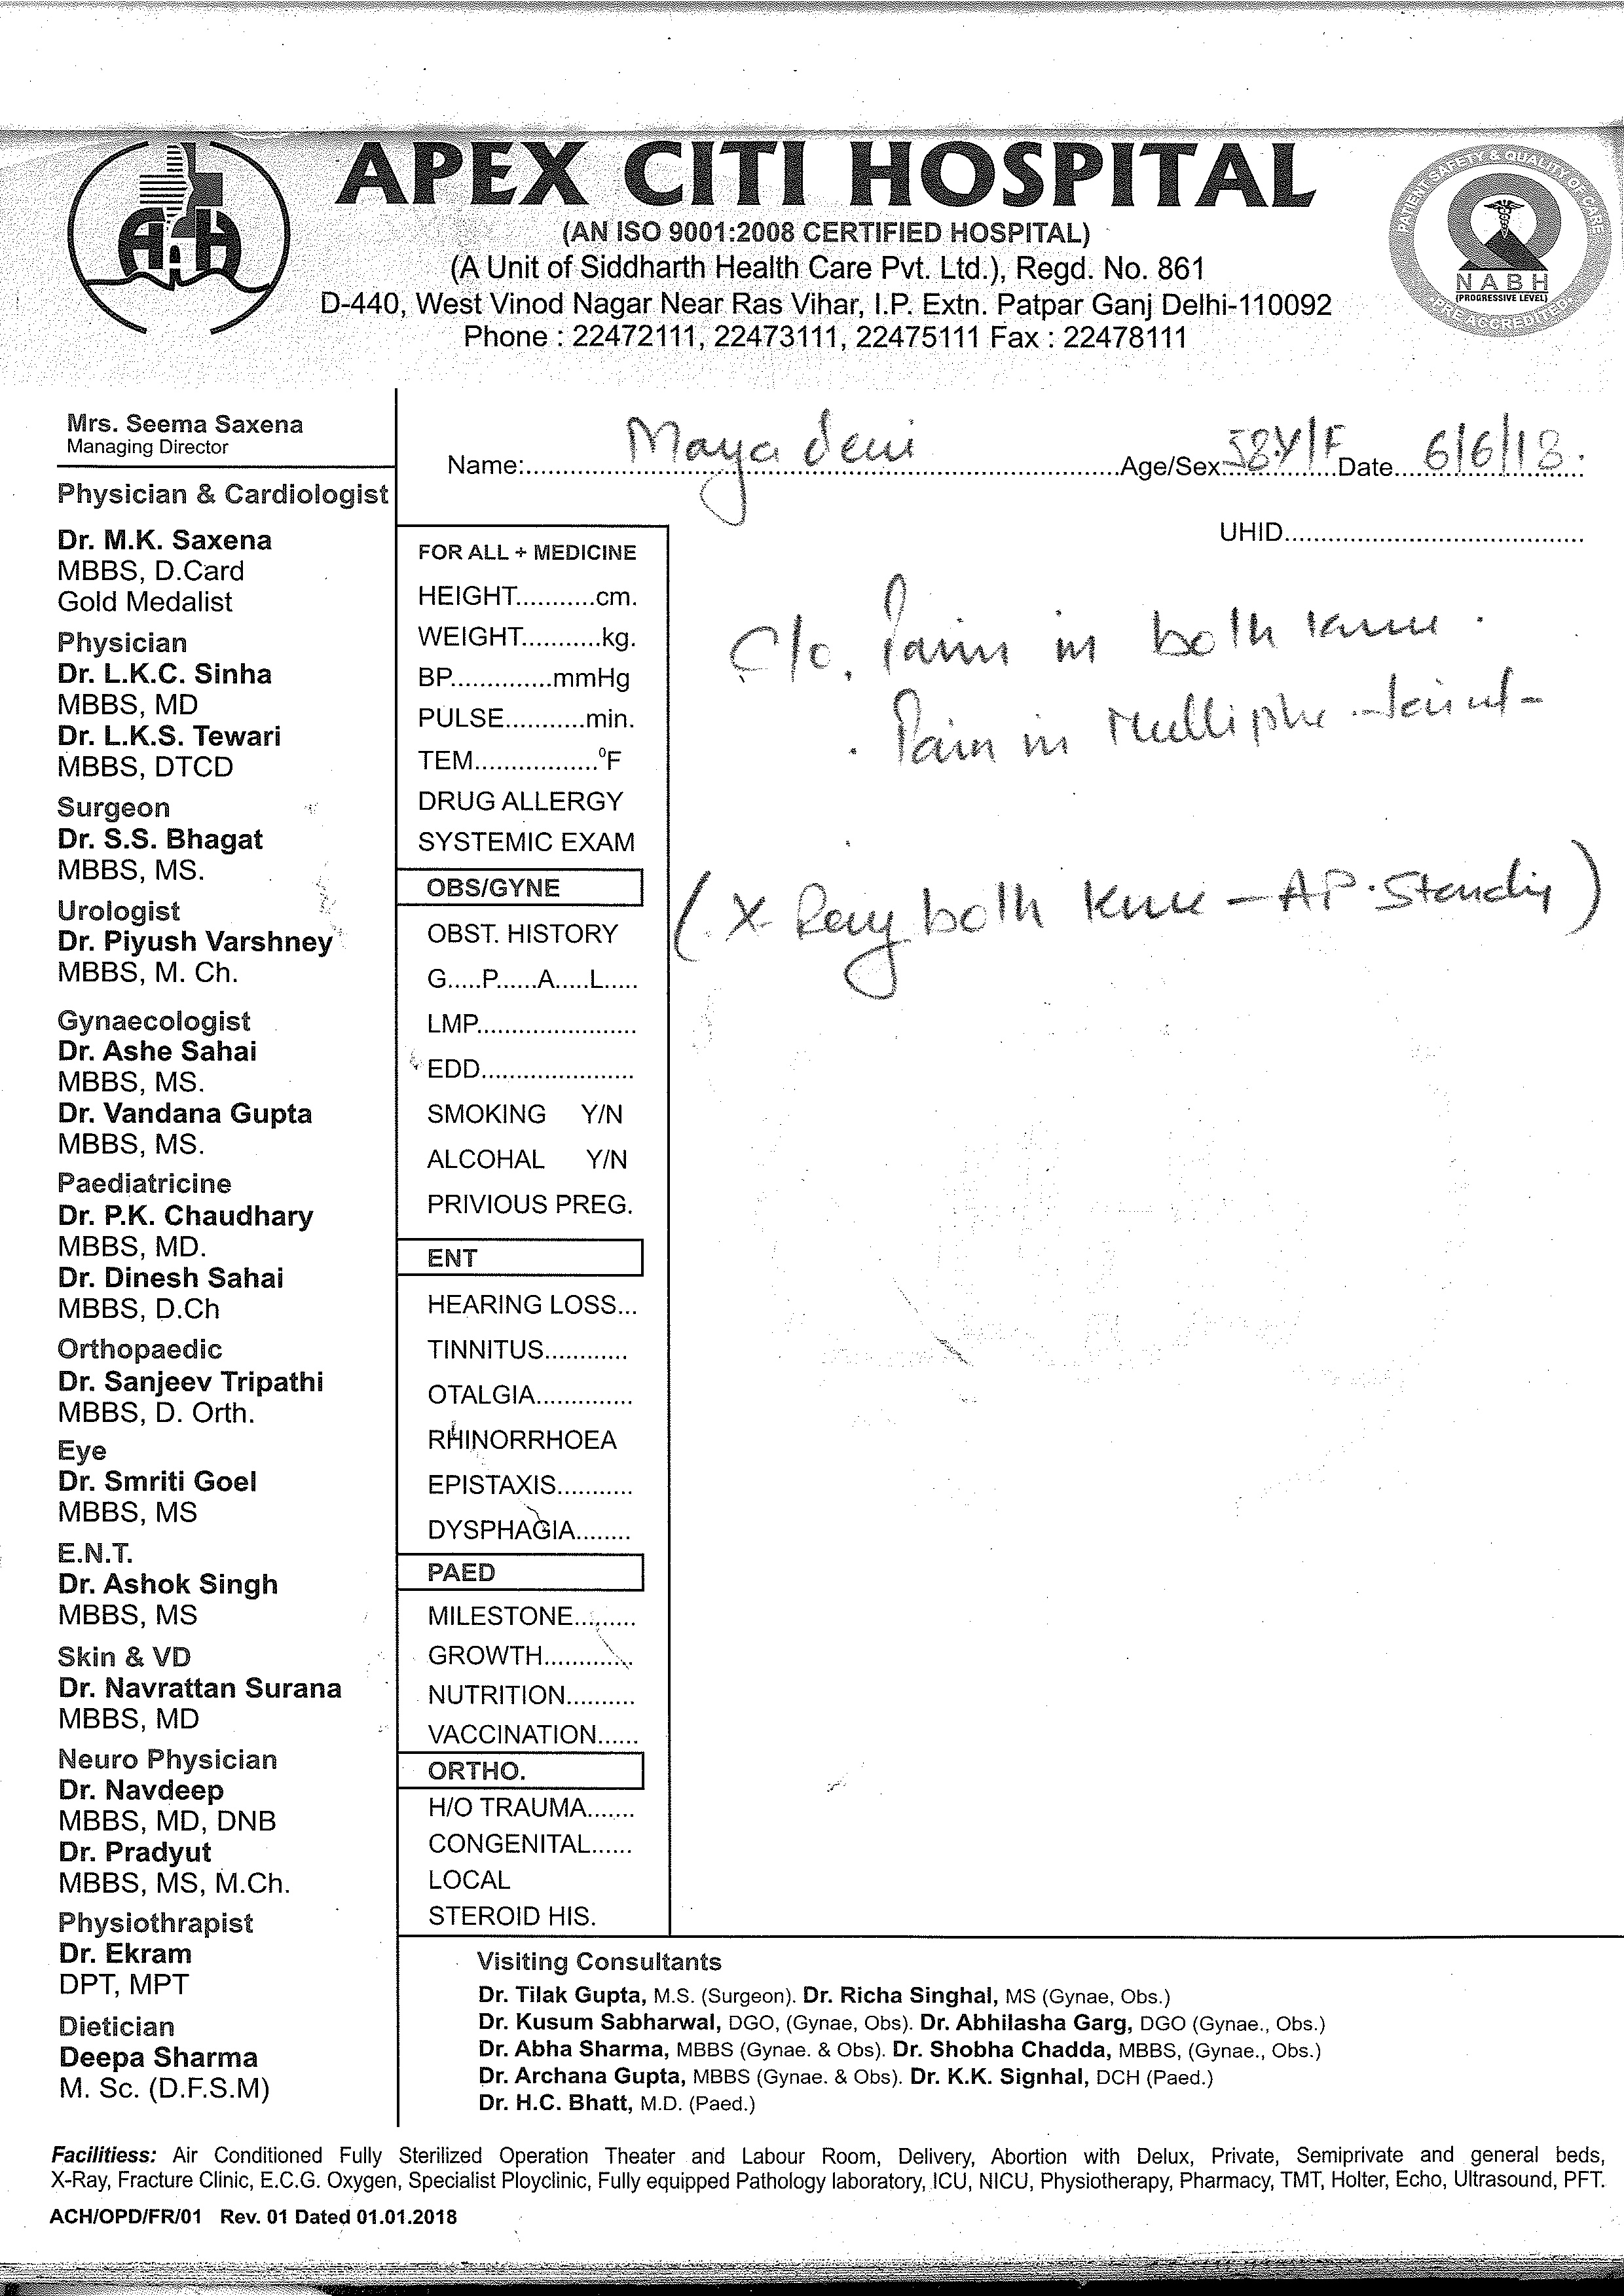

In [25]:
img = cv2.imread("result-0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = cv2.blur(gray,(1,1))
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

cv2.imwrite("result-2.jpg", gray)
Image(filename='result-2.jpg')

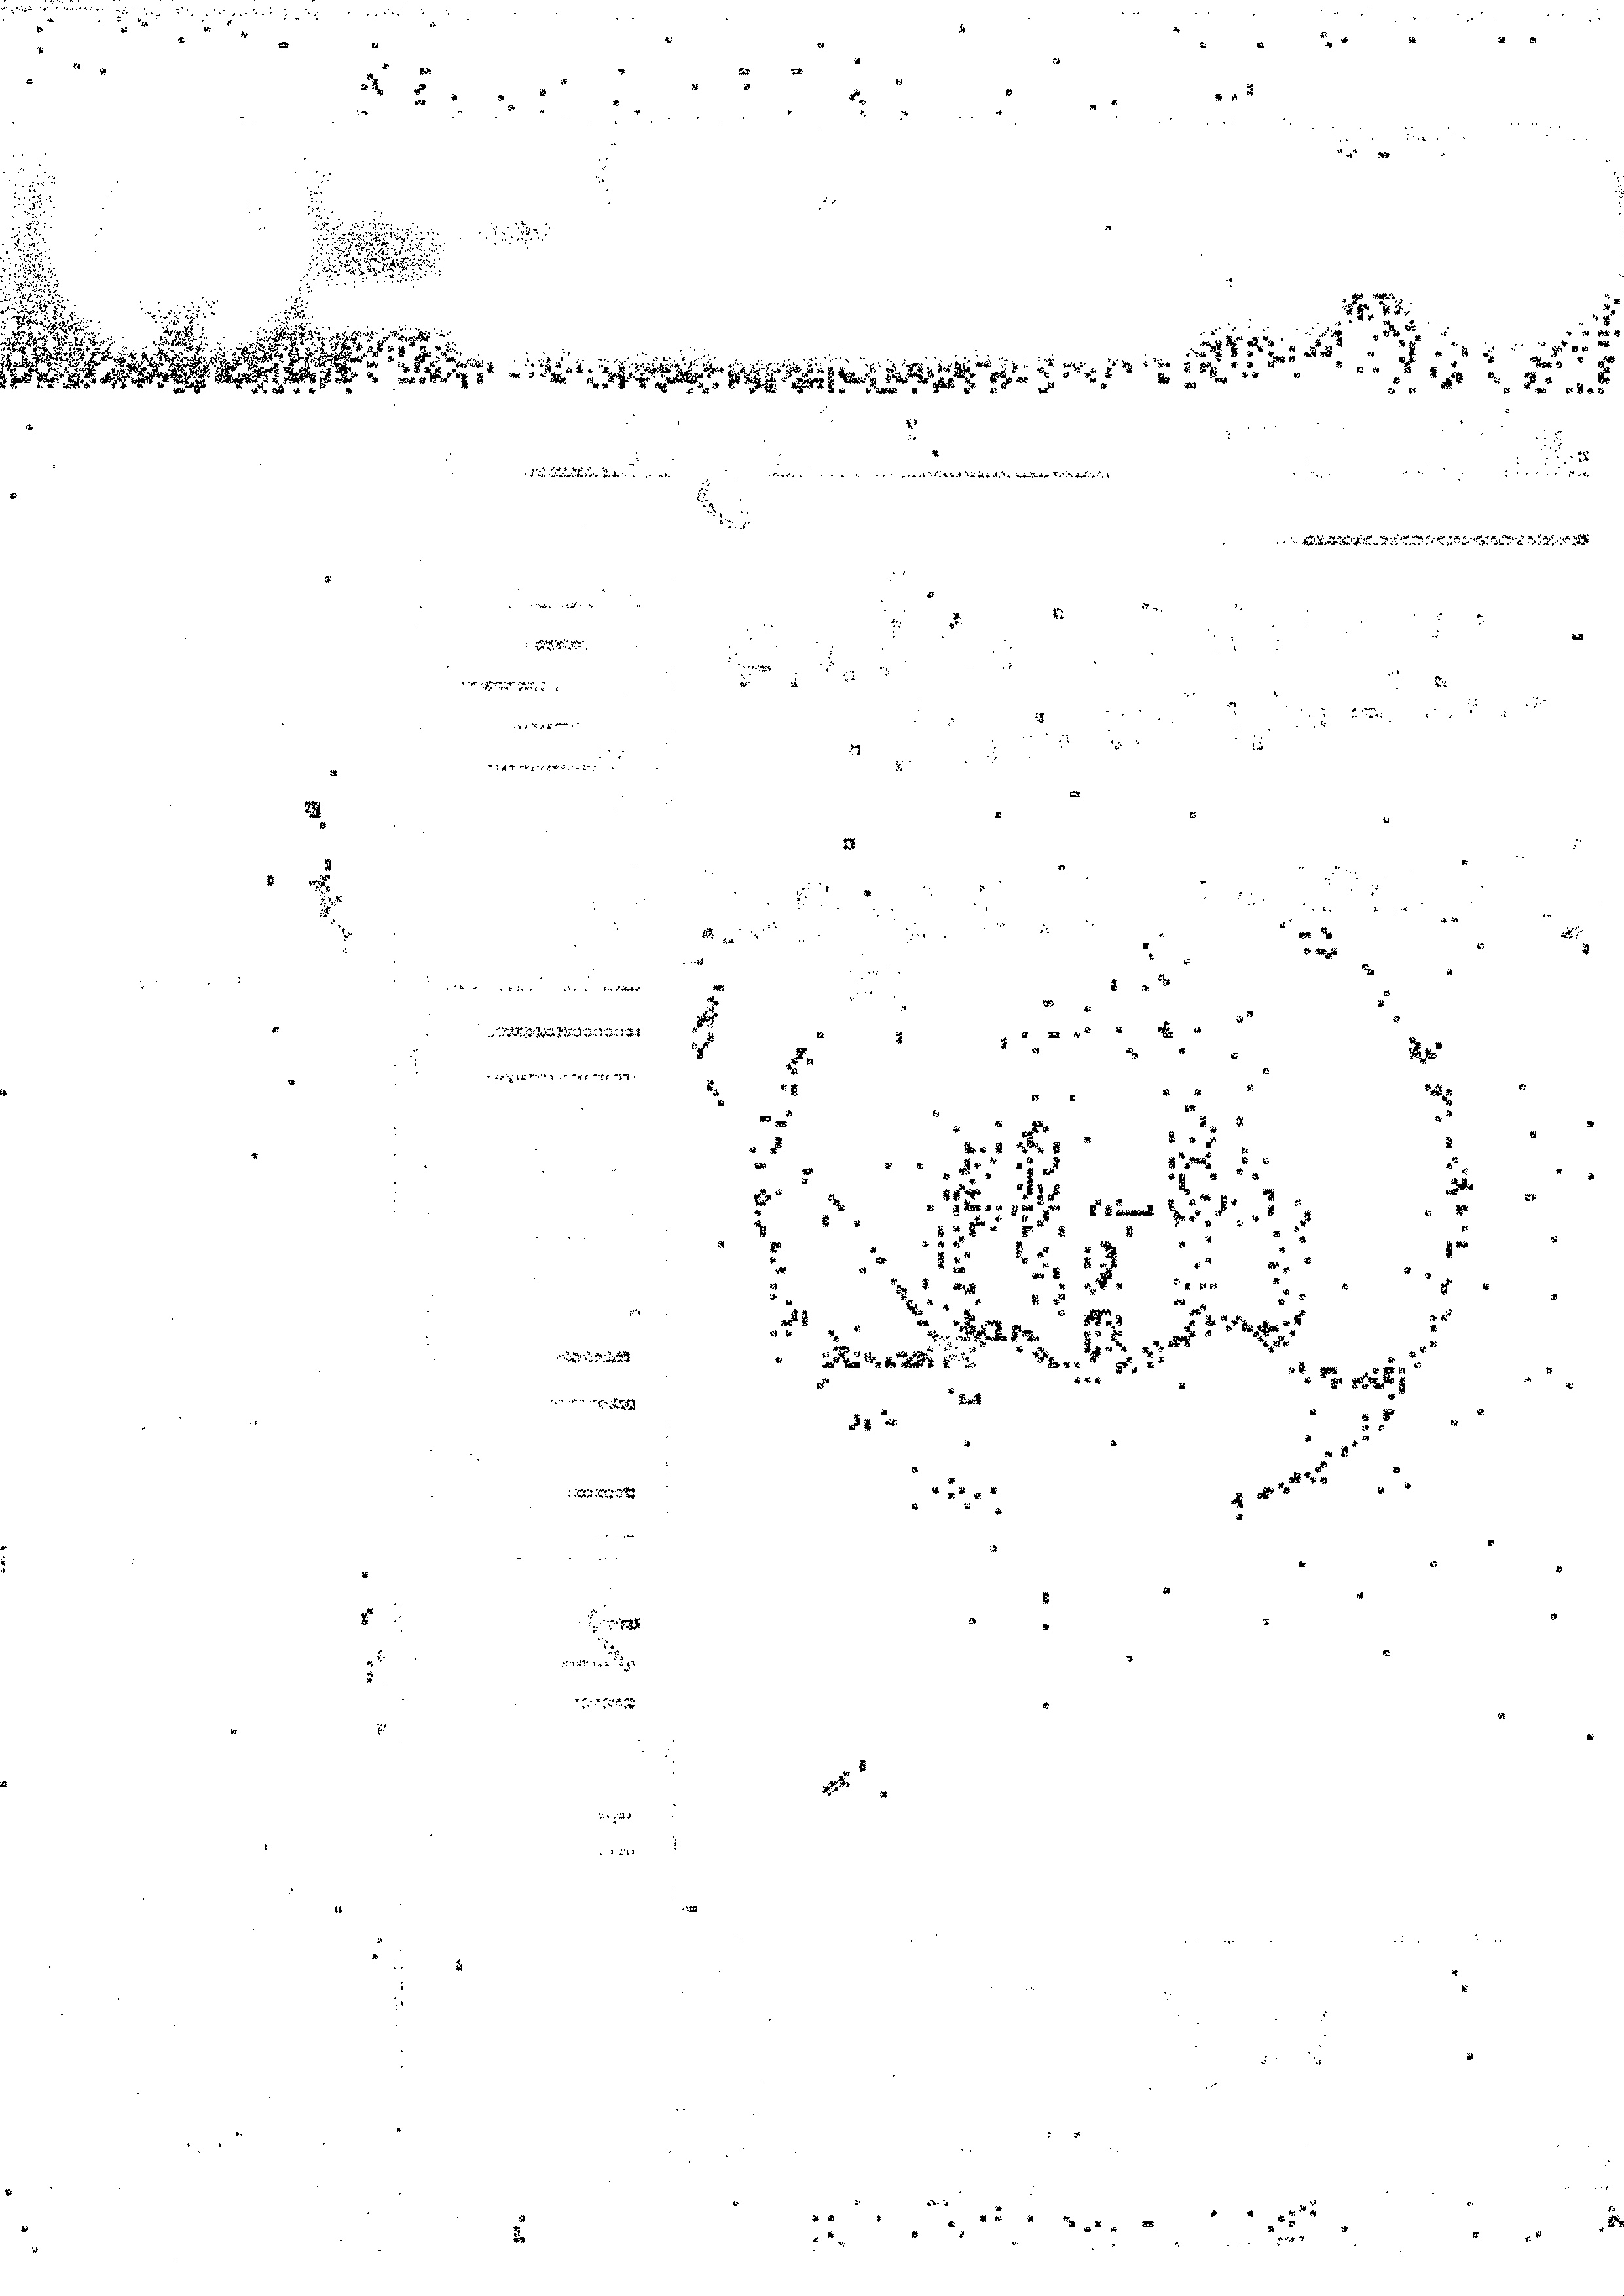

In [26]:
def my_blur(img):
    img = cv2.adaptiveThreshold(img, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 115, 4)
    
    k1 = np.ones((1,1),np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, k1)

    _,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV)

    k1 = np.ones((2,2),np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_DILATE, k1)
    
    img = cv2.blur(img,(2,2))
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    return img

img1 = cv2.imread("result-0.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = my_blur(img1)

img2 = cv2.imread("result-2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = my_blur(img2)

img = cv2.absdiff(img1, img2)
img = cv2.bitwise_not(img)

#kernel = np.ones((1,1),np.uint8)
#img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imwrite("result-3.jpg", img)
Image(filename='result-3.jpg')